## Final Project Submission

Please fill out:
* Student name: Jason Richards
* Student pace: part time
* Scheduled project review date/time: 03/07/2019 @ 3:00pm
* Instructor name: Joe San Pietro
* Blog post URL:https://jasonrichards911.wixsite.com/humble-py 


# Obtain the Data

The first step in the process is to obtain the data. Since the file is listed as a .csv file, pandas was selected as the method for import. Pandas allows us a fast download option with immediate visual confirmation. 

In [1]:
#importing data and obtaining tools
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
#loading the file
df = pd.read_csv('kc_house_data.csv')
#checking the data to ensure load
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


As you can see, we can immediately check to see if the data was properly loaded into the DataFrame and provides us an initial look at the data. We also want to take a glimpse of the total size and types of data present in the database.

In [2]:
#initial glimpse of the info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


Looks like there is going to be some scrubbing that will need to be performed. Also seems there is categorical information as well as some values that need a closer look. Let's take a look at the unique value range in 'condition' and 'grade'.

In [3]:
#checking the unique values in condition 
df.condition.unique()

array([3, 5, 4, 1, 2], dtype=int64)

In [4]:
#checking unique values in grade
df.grade.unique()

array([ 7,  6,  8, 11,  9,  5, 10, 12,  4,  3, 13], dtype=int64)

## Data Research

Before moving onto our scrubbing phase, there were some initial notes that required further research to better understand the data involved in the project. Here is a list of initial notes on the data:

1. Bathrooms are noted in floats - what is .25 of a restroom?
2. View represents if the house was viewed.
3. Is sqftliving15 and sqftlot15 averaged (nearest 15 neighbors)?
4. Having latitude and longitude data will alow us to map (good for visuals).
5. Need to look into the 'grade' and 'condition'columns a little further - how is the scale determined and how is the grading score calculated?

**Regarding a .25 bathroom, after web search (not much data available) it looks like a quarter bathroom is just a sink.

**Regarding building condition - Relative to age and grade. Coded 1-5.

1 = Poor- Worn out. Repair and overhaul needed on painted surfaces, roofing, plumbing, heating and numerous functional inadequacies. Excessive deferred maintenance and abuse, limited value-in-use, approaching abandonment or major reconstruction; reuse or change in occupancy is imminent. Effective age is near the end of the scale regardless of the actual chronological age.

2 = Fair- Badly worn. Much repair needed. Many items need refinishing or overhauling, deferred maintenance obvious, inadequate building utility and systems all shortening the life expectancy and increasing the effective age.

3 = Average- Some evidence of deferred maintenance and normal obsolescence with age in that a few minor repairs are needed, along with some refinishing. All major components still functional and contributing toward an extended life expectancy. Effective age and utility is standard for like properties of its class and usage.

4 = Good- No obvious maintenance required but neither is everything new. Appearance and utility are above the standard and the overall effective age will be lower than the typical property.

5= Very Good- All items well maintained, many having been overhauled and repaired as they have shown signs of wear, increasing the life expectancy and lowering the effective age with little deterioration or obsolescence evident with a high degree of utility. 

Found from: https://info.kingcounty.gov/assessor/esales/glossary.aspx?type=r

**Regarding building grade - Represents the construction quality of improvements. Grades run from grade 1 to 13. Generally defined as:

1-3 Falls short of minimum building standards. Normally cabin or inferior structure.

4 Generally older, low quality construction. Does not meet code.

5 Low construction costs and workmanship. Small, simple design.

6 Lowest grade currently meeting building code. Low quality materials and simple designs.

7 Average grade of construction and design. Commonly seen in plats and older sub-divisions.

8 Just above average in construction and design. Usually better materials in both the exterior and interior finish work.

9 Better architectural design with extra interior and exterior design and quality.

10 Homes of this quality generally have high quality features. Finish work is better and more design quality is seen in the floor plans. Generally have a larger square footage.

11 Custom design and higher quality finish work with added amenities of solid woods, bathroom fixtures and more luxurious options.

12 Custom design and excellent builders. All materials are of the highest quality and all conveniences are present.

13 Generally custom designed and built. Mansion level. Large amount of highest quality cabinet work, wood trim, marble, entry ways etc. 

Found from: https://info.kingcounty.gov/assessor/esales/glossary.aspx?type=r

# Data Scrub

Now that we have a better insight into the actual data, its time to clean up the data and get it ready for exploration. Based on df.info() above, we are going to first handle those values that are objects.

### date

The date is set as a mm/dd/yyyy format and the '/' have saved these values as objects. Time of year for home sales is of definite interest for us initially as a predictor of price, but not by exact date. We will pull the month and create its own column. We will leave the date as a category.

In [5]:
#convert date feature to a datetime object
pd.to_datetime(df.date)
#create new feature pulling the month from the datetime object
df['month']=pd.DatetimeIndex(df['date']).month
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,10
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,12
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062,2
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,12
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,2


### sqft_basement

This object just needs converted to a numerical format and discovered there is a value '?' that we need to handle before converting this column. 

In [6]:
df.sqft_basement.unique().max()

'?'

In [7]:
#get rid of rows with '?'
df=df[df.sqft_basement != '?']
#convert all values to a numerical
df.sqft_basement=df.sqft_basement.astype(float, inplace=True)
df.sqft_basement=df.sqft_basement.astype(np.int64, inplace=True)

In [8]:
df.sqft_basement.count()

21143

### price, floors

These just needs to be converted from a float to an integer

In [9]:
df.price = df.price.astype(np.int64, inplace=True)
df.floors = df.floors.astype(np.int64, inplace=True)

### Removable data

The features of id, long and lat will be removed from the dataset. It is believed that the longitude and latitude of the homes will be of use for investor visualization, but the zipcode should suffice for location data. The id created by the county will have no relevance to price. Waterfront is basically True/False value set as integers. The True or 1 values are so few (less than 5% of total observations), it is safe to just eliminate this feature.

In [10]:
#drop the columns inplace
df.drop('id', axis=1, inplace=True)
df.drop('long', axis=1, inplace=True)
df.drop('lat', axis=1, inplace=True)
df.drop('date', axis=1, inplace=True)
df.drop('waterfront', axis=1, inplace=True)

### Null Values

Waterfront, view and yr_renovated columns all contain null values. We are going to take care of these so that we have full data columns. While we are fixing the null values, each column will be handled individually to determine what to do with the vaid data.

In [11]:
df.view.unique()

array([ 0., nan,  3.,  4.,  2.,  1.])

In [12]:
df.yr_renovated.unique()

array([   0., 1991.,   nan, 2002., 2010., 1992., 2013., 1994., 1978.,
       2005., 2003., 1984., 1954., 2014., 2011., 1983., 1945., 1990.,
       1988., 1977., 1981., 1995., 2000., 1999., 1998., 1970., 1989.,
       2004., 1986., 2007., 1987., 2006., 1985., 1980., 1971., 1979.,
       1997., 1950., 1969., 1948., 2009., 2015., 1974., 2008., 1968.,
       2012., 1963., 1951., 1962., 2001., 1953., 1993., 1996., 1955.,
       1982., 1956., 1940., 1976., 1975., 1964., 1973., 1957., 1959.,
       1960., 1967., 1965., 1934., 1972., 1944., 1958.])

View is the rating of the view from the property. Again, there are so few values that eliminating the rows with the null values will not greatly effect the dataset. Yr_renovated has the actual year of renovation, a 0 value for not renovated, and the corresponding null values. We will convert the null values to the mean since there are over 4000 elements that have null values.

In [13]:
#convert values into dataframe as listed

df.yr_renovated.fillna(value = df.yr_renovated.median(), inplace=True)
df.yr_renovated = df.yr_renovated.astype(np.int64, inplace=True)

In [14]:
#this prop will take care of the view null values
df=df.dropna()

In [15]:
#convert view to integer
df.view=df.view.astype(np.int64)

Lets have a look at our dataframe now and see if our data looks good.

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21082 entries, 0 to 21596
Data columns (total 17 columns):
price            21082 non-null int64
bedrooms         21082 non-null int64
bathrooms        21082 non-null float64
sqft_living      21082 non-null int64
sqft_lot         21082 non-null int64
floors           21082 non-null int64
view             21082 non-null int64
condition        21082 non-null int64
grade            21082 non-null int64
sqft_above       21082 non-null int64
sqft_basement    21082 non-null int64
yr_built         21082 non-null int64
yr_renovated     21082 non-null int64
zipcode          21082 non-null int64
sqft_living15    21082 non-null int64
sqft_lot15       21082 non-null int64
month            21082 non-null int64
dtypes: float64(1), int64(16)
memory usage: 2.9 MB


Final scrub is to find any duplicated rows and remove.

In [17]:
#find duplicates and adds up all True values
df.duplicated(keep=False).sum()

4

What??? Four duplicates? We will get rid of those rows as well.

In [18]:
df=df.drop_duplicates()

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21080 entries, 0 to 21596
Data columns (total 17 columns):
price            21080 non-null int64
bedrooms         21080 non-null int64
bathrooms        21080 non-null float64
sqft_living      21080 non-null int64
sqft_lot         21080 non-null int64
floors           21080 non-null int64
view             21080 non-null int64
condition        21080 non-null int64
grade            21080 non-null int64
sqft_above       21080 non-null int64
sqft_basement    21080 non-null int64
yr_built         21080 non-null int64
yr_renovated     21080 non-null int64
zipcode          21080 non-null int64
sqft_living15    21080 non-null int64
sqft_lot15       21080 non-null int64
month            21080 non-null int64
dtypes: float64(1), int64(16)
memory usage: 2.9 MB


Before moving into exploration, it would be a good idea to save the dataframe as its own .csv to compare original data to the final set. It will be saved as 'df_clean.csv'

In [20]:
df.to_csv('df_clean.csv', index=False)

# Exploring the Data

We are going to take a look at a correlation heatmap to detect early signs of multicollinearity between features.

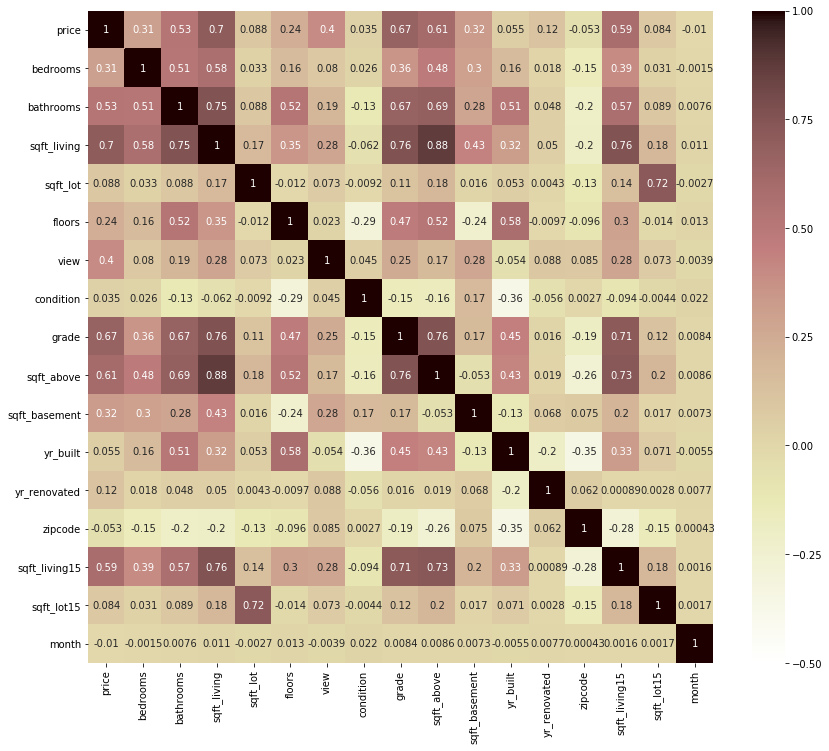

In [21]:
#awesome heatmap code with individual annotation for a multicollinearity map
correlation = df.corr()
plt.figure(figsize=(14,12))
heatmap = sns.heatmap(correlation, annot=True, linewidths = 0, vmin=-.5, cmap='pink_r')

Sqft_living and sqft_above are very highly correlated, due to that and that we have the living area of the 15 nearest neighbors, we will remove sqft_living from the dataset

In [22]:
df.drop('sqft_living', axis=1, inplace=True)

In [23]:
df.describe()

,price,bedrooms,bathrooms,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,month
count,2.108000e+04,21080.000000,21080.000000,2.108000e+04,21080.000000,21080.000000,21080.000000,21080.000000,21080.000000,21080.000000,21080.000000,21080.000000,21080.000000,21080.000000,21080.000000,21080.000000
mean,5.402607e+05,3.372486,2.115916,1.507894e+04,1.445636,0.233349,3.409867,7.657590,1789.068691,291.371015,1971.019545,68.365844,98077.855693,1986.983539,12733.613994,6.576471
std,3.667446e+05,0.924988,0.768177,4.117510e+04,0.551262,0.765099,0.650615,1.173673,828.371814,442.024086,29.321911,363.046184,53.530312,685.539809,27149.834582,3.114166
min,7.800000e+04,1.000000,0.500000,5.200000e+02,1.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,399.000000,651.000000,1.000000
25%,3.220000e+05,3.000000,1.750000,5.040000e+03,1.000000,0.000000,3.000000,7.000000,1200.000000,0.000000,1952.000000,0.000000,98033.000000,1490.000000,5100.000000,4.000000
50%,4.500000e+05,3.000000,2.250000,7.620000e+03,1.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,1840.000000,7626.000000,6.000000
75%,6.450000e+05,4.000000,2.500000,1.069875e+04,2.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98117.000000,2360.000000,10089.000000,9.000000
max,7.700000e+06,33.000000,8.000000,1.651359e+06,3.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,6210.000000,871200.000000,12.000000


Now we will take an indepth look at the leftover data. A great visualization tool for this is the scatter matrix. This will show us distribution of the features via histograms as well as the distribution to each point via scatter plots. Many observations can be made from this plot.

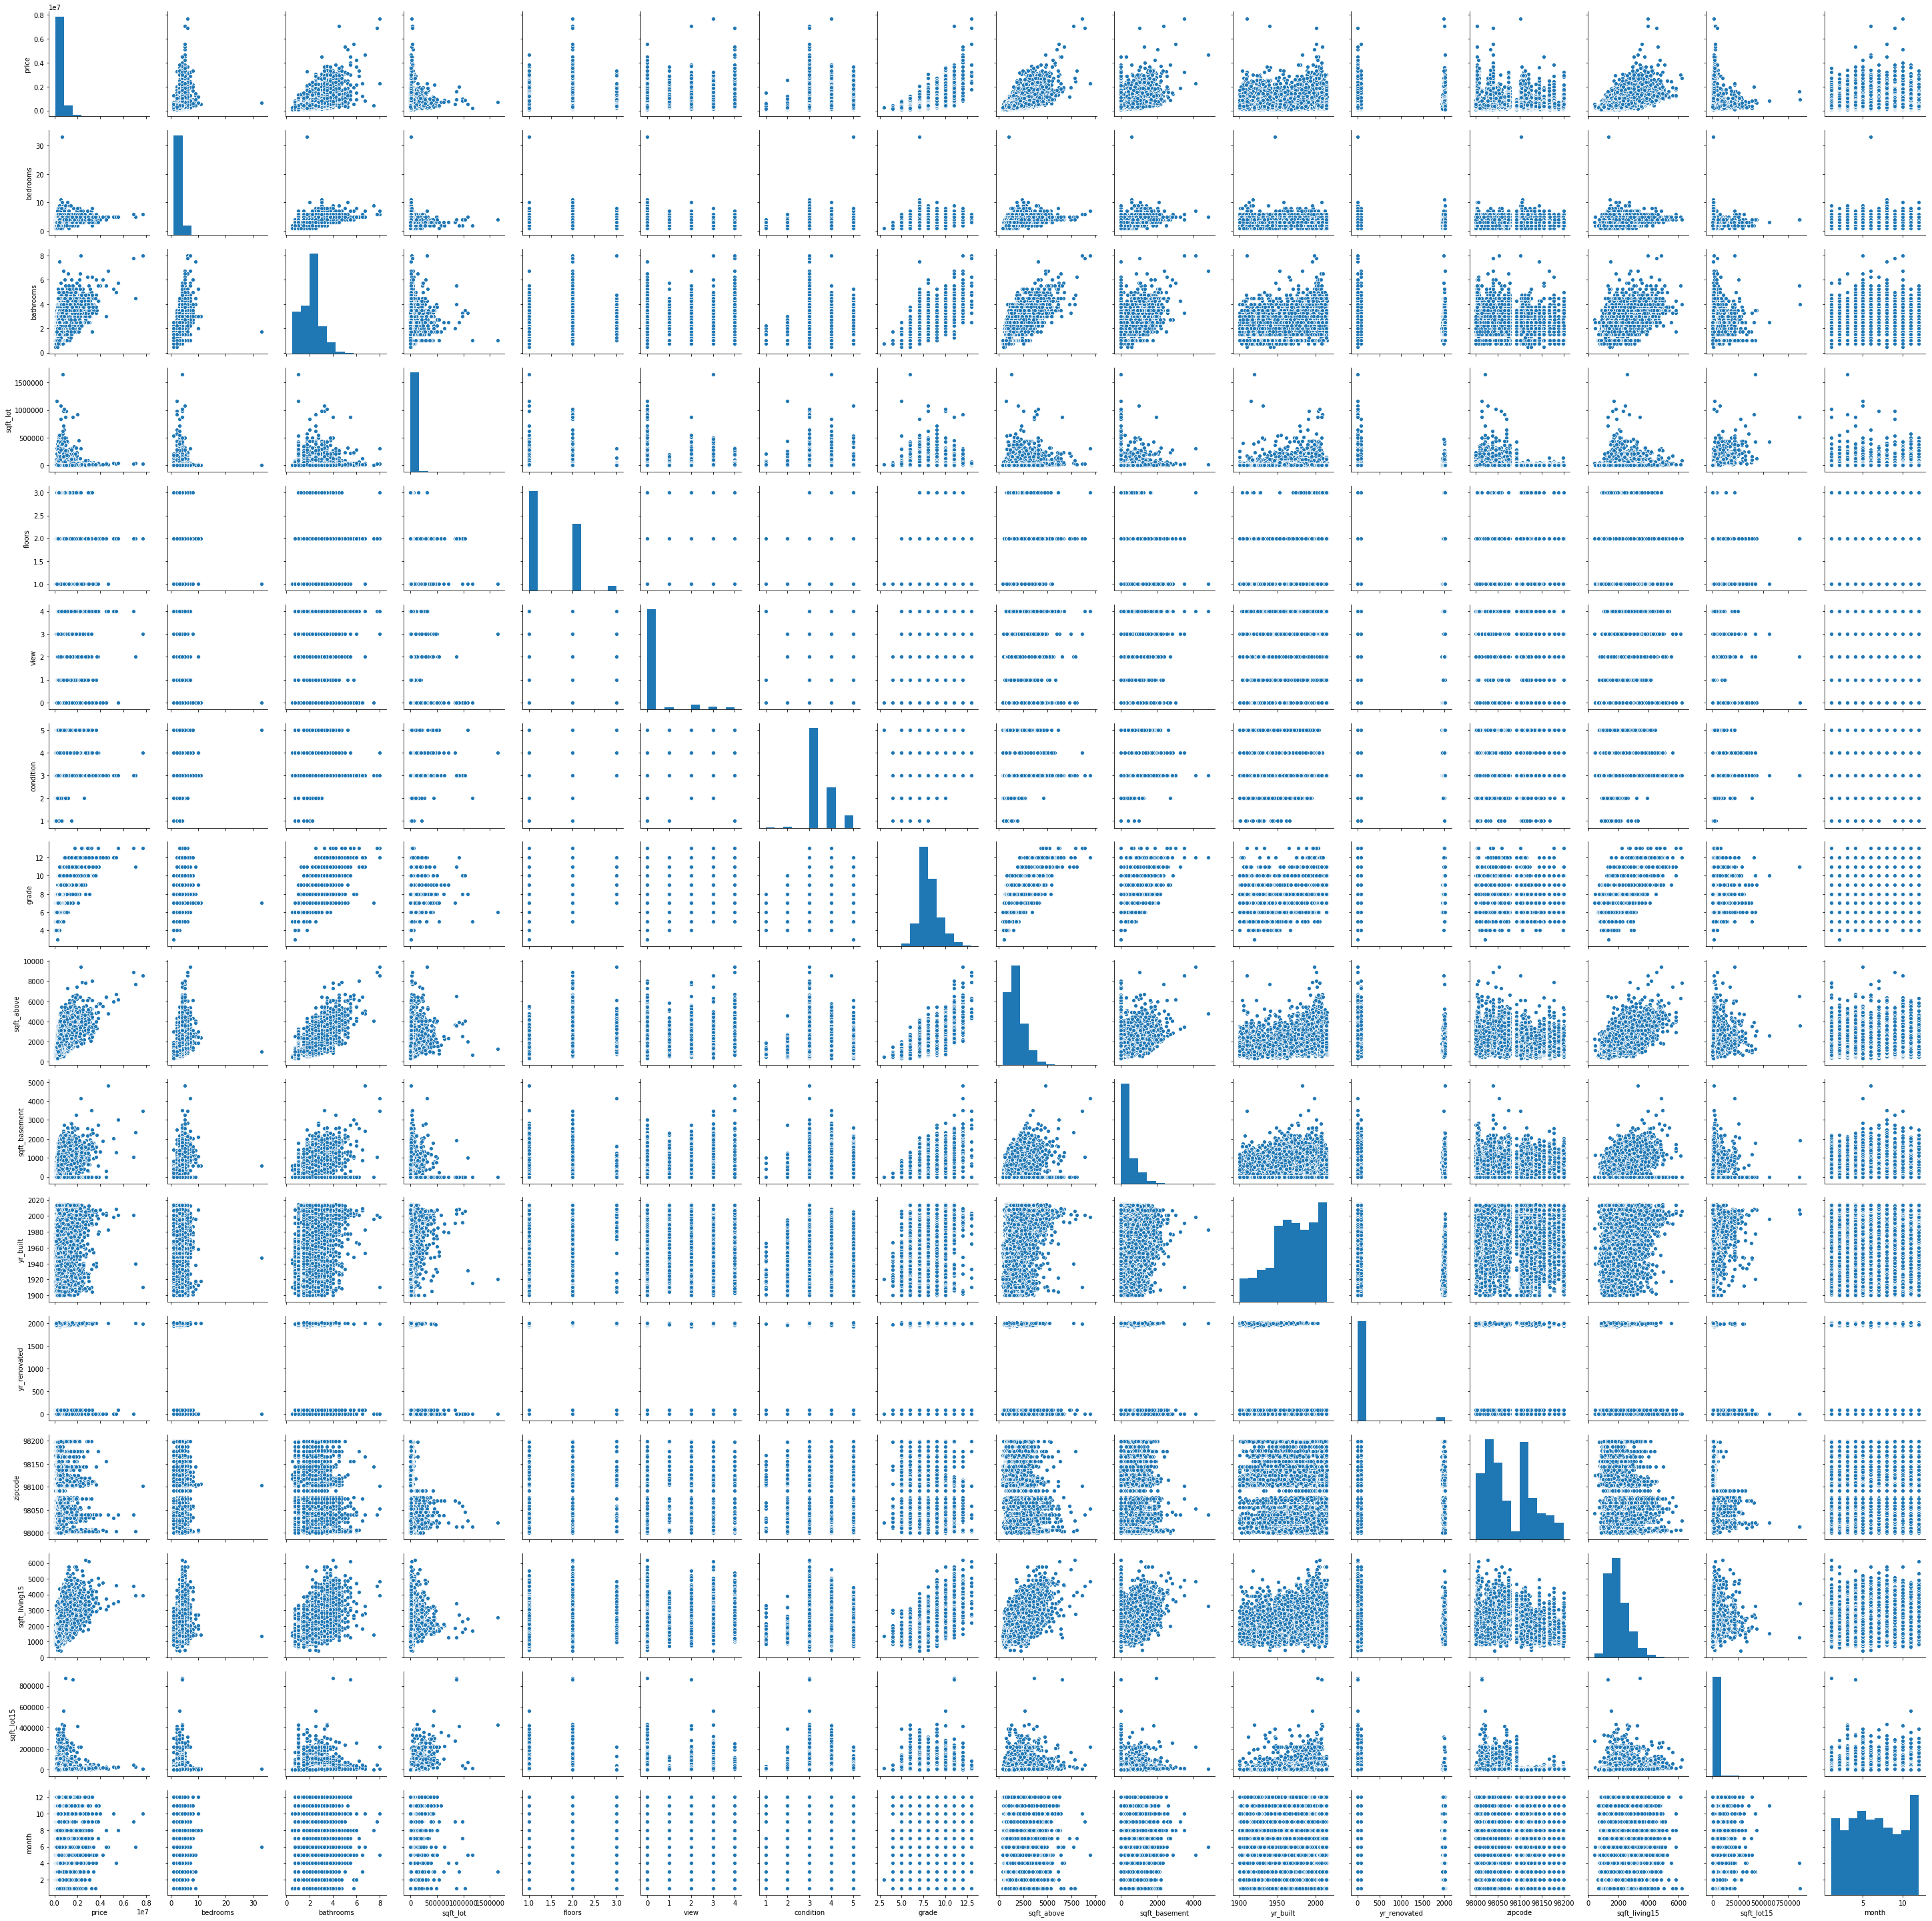

In [26]:
#creates a scatter matrix visualization between all features
sns.pairplot(df);

Observations from scatter matrix visualization:

*Several features show categorical trend (view,grade,condition,floors,bathrooms,bedrooms,month,yr_renovated)
*The categorical columns also show homoscedasticity
*Non-categorical trending columns do show forms of heteroscedasticity
*Validates a high correlation between sqft_above and sqft_living

## Categorize Data

The features considered very categorical in element values and visualization will be categorized and binned using OHE. There also was an issue with the numerical data in sqft_basement. Rather than eliminate it, I categorized and binned it.

In [24]:
#categorize features
df.view=df.view.astype('category', inplace = True)
df.grade=df.grade.astype('category', inplace=True)
df.condition=df.condition.astype('category', inplace=True)
df.floors=df.floors.astype('category', inplace=True)
df.month=df.month.astype('category', inplace=True)
df.yr_renovated=df.yr_renovated.astype('category', inplace=True)
df.sqft_basement=df.sqft_basement.astype('category', inplace=True)


In [25]:
#one hot encode categorized features and save as its own df
df=pd.get_dummies(df)

In [26]:
#check data to ensure changes were made
df.head()

,price,bedrooms,bathrooms,sqft_lot,sqft_above,yr_built,zipcode,sqft_living15,sqft_lot15,floors_1,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,221900,3,1.00,5650,1180,1955,98178,1340,5650,1,...,0,0,0,0,0,0,0,1,0,0
1,538000,3,2.25,7242,2170,1951,98125,1690,7639,0,...,0,0,0,0,0,0,0,0,0,1
2,180000,2,1.00,10000,770,1933,98028,2720,8062,1,...,0,0,0,0,0,0,0,0,0,0
3,604000,4,3.00,5000,1050,1965,98136,1360,5000,1,...,0,0,0,0,0,0,0,0,0,1
4,510000,3,2.00,8080,1680,1987,98074,1800,7503,1,...,0,0,0,0,0,0,0,0,0,0


## Scale Continuous Data

We are going to scale all of the continuous data and visualize each feature as a KDE with Histogram to check distribution

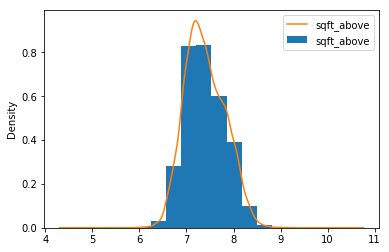

In [27]:
df['sqft_above'] = np.log(df['sqft_above'])
df['sqft_above'].plot.hist(density=True )
df['sqft_above'].plot.kde(label='sqft_above')
plt.legend()
plt.show()

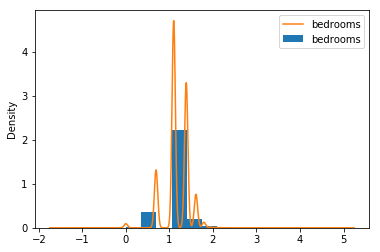

In [28]:
df['bedrooms'] = np.log(df['bedrooms'])
df['bedrooms'].plot.hist(density=True )
df['bedrooms'].plot.kde(label='bedrooms')
plt.legend()
plt.show()

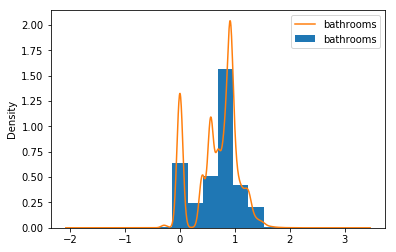

In [29]:
df['bathrooms'] = np.log(df['bathrooms'])
df['bathrooms'].plot.hist(density=True )
df['bathrooms'].plot.kde(label='bathrooms')
plt.legend()
plt.show()

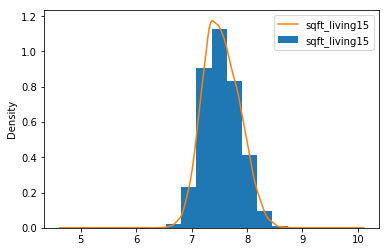

In [30]:
df['sqft_living15'] = np.log(df['sqft_living15'])
df['sqft_living15'].plot.hist(density=True )
df['sqft_living15'].plot.kde(label='sqft_living15')
plt.legend()
plt.show()

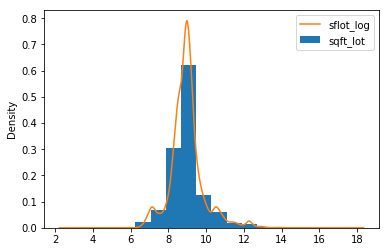

In [31]:
df['sqft_lot'] = np.log(df['sqft_lot'])
df['sqft_lot'].plot.hist(density=True )
df['sqft_lot'].plot.kde(label='sflot_log')
plt.legend()
plt.show()

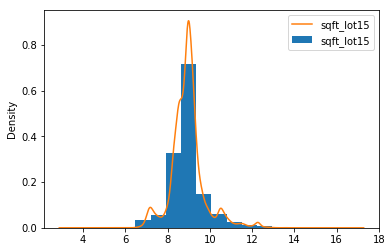

In [32]:
df['sqft_lot15'] = np.log(df['sqft_lot15'])
df['sqft_lot15'].plot.hist(density=True )
df['sqft_lot15'].plot.kde(label='sqft_lot15')
plt.legend()
plt.show()

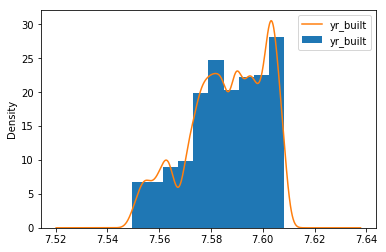

In [33]:
df['yr_built'] = np.log(df['yr_built'])
df['yr_built'].plot.hist(density=True )
df['yr_built'].plot.kde(label='yr_built')
plt.legend()
plt.show()

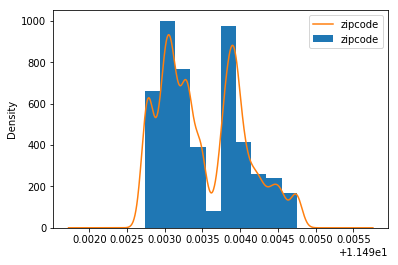

In [34]:
df['zipcode'] = np.log(df['zipcode'])
df['zipcode'].plot.hist(density=True )
df['zipcode'].plot.kde(label='zipcode')
plt.legend()
plt.show()

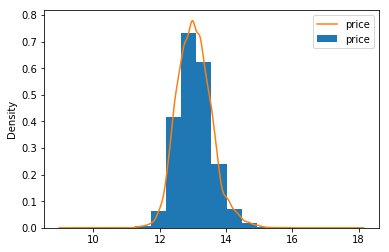

In [35]:
df['price'] = np.log(df['price'])
df['price'].plot.hist(density=True )
df['price'].plot.kde(label='price')
plt.legend()
plt.show()

Although some features have multiple peaks and all features tend towards a leptokurtic shape, the data selected does have a normal trend.

## Questions to ask

1. What are the top three features that attribute to price?

2. Is there any findings on location of home that is valuable to an investor?

3. Is there any findings on time of year that is valuable to an investor?

## Fit a Model

This first model (ordinary least squares) fit will provide us the individual features results against the target 'price'.

In [36]:
#import statsmodels to build linear regression models
import statsmodels.formula.api as smf
col_names = df.describe().columns.drop(['price'])
results = [['ind_var', 'r_squared', 'intercept', 'slope', 'p-value' ]]
for idx, val in enumerate(col_names):
    print ("Housing: Price~" + val)
    print ("------------------------------")

    f = 'price~' + val
    model = smf.ols(formula=f, data=df).fit()
    X_new = pd.DataFrame({val: [df[val].min(), df[val].max()]});
    preds = model.predict(X_new)
    results.append([val, model.rsquared, model.params[0], model.params[1], model.pvalues[1] ])
    print(results[idx+1])

Housing: Price~bedrooms
------------------------------
['bedrooms', 0.11687324193501736, 12.298458940937541, 0.6366261757063817, 0.0]
Housing: Price~bathrooms
------------------------------
['bathrooms', 0.2700097936213982, 12.575445729395538, 0.6975438381446015, 0.0]
Housing: Price~sqft_lot
------------------------------
['sqft_lot', 0.01910757620180381, 12.322266850780338, 0.08074522938053108, 1.9773864458498903e-90]
Housing: Price~sqft_above
------------------------------
['sqft_above', 0.3431521665337005, 7.707433985620273, 0.7221758466332638, 0.0]
Housing: Price~yr_built
------------------------------
['yr_built', 0.006343904082415364, -8.253315887047961, 2.8079364968003375, 5.0926455456546424e-31]
Housing: Price~zipcode
------------------------------
['zipcode', 0.0014804975043730684, 439.6221545236572, -37.11430767468626, 2.2939638517864148e-08]
Housing: Price~sqft_living15
------------------------------
['sqft_living15', 0.36914684080605376, 5.683137677125269, 0.976845399155241

------------------------------
['sqft_basement_200', 1.0686871629861372e-06, 13.048276503212783, -0.007729618645400227, 0.880698188980601]
Housing: Price~sqft_basement_207
------------------------------
['sqft_basement_207', 2.6674251759617462e-06, 13.048232080330001, 0.12482441139079725, 0.8125688748147789]
Housing: Price~sqft_basement_210
------------------------------
['sqft_basement_210', 6.271908921573477e-05, 13.04838449821963, -0.1187747962271617, 0.25023287999603483]
Housing: Price~sqft_basement_220
------------------------------
['sqft_basement_220', 0.0001877023462407701, 13.048564052369393, -0.1598406088374929, 0.046686040354288125]
Housing: Price~sqft_basement_225
------------------------------
['sqft_basement_225', 1.5129808410563328e-05, 13.048223899181131, 0.297283029538308, 0.5722688838966904]
Housing: Price~sqft_basement_230
------------------------------
['sqft_basement_230', 1.162148001132568e-05, 13.04819699904964, 0.0785761636699589, 0.6206513421767093]
Housing: Pr

['sqft_basement_510', 6.903873972619046e-05, 13.048446948030882, -0.09176222340092655, 0.2276931179832756]
Housing: Price~sqft_basement_515
------------------------------
['sqft_basement_515', 0.00014879936753986467, 13.0481754544812, 0.659248652067725, 0.07655548896548357]
Housing: Price~sqft_basement_516
------------------------------
['sqft_basement_516', 2.5867114361588506e-06, 13.048232170607061, 0.12292137096756761, 0.8153744483871466]
Housing: Price~sqft_basement_518
------------------------------
['sqft_basement_518', 7.905947917108413e-06, 13.0482278074362, 0.2148970126734553, 0.6831169248464004]
Housing: Price~sqft_basement_520
------------------------------
['sqft_basement_520', 4.8404532076995466e-05, 13.048029662313184, 0.06458523831639562, 0.3124546840436645]
Housing: Price~sqft_basement_530
------------------------------
['sqft_basement_530', 0.0002896480962487624, 13.048865756619861, -0.1284764250383758, 0.013472811254907494]
Housing: Price~sqft_basement_540
-----------

['sqft_basement_870', 0.0004902378072949576, 13.04768121165673, 0.2445236675810898, 0.0013049428234528225]
Housing: Price~sqft_basement_875
------------------------------
['sqft_basement_875', 4.810208316330389e-06, 13.048230050004616, 0.16762367048390026, 0.7501709983141922]
Housing: Price~sqft_basement_880
------------------------------
['sqft_basement_880', 0.001104161889576627, 13.047242951718044, 0.30846552280860107, 1.3962487113507458e-06]
Housing: Price~sqft_basement_890
------------------------------
['sqft_basement_890', 0.00036807341303968233, 13.047735800632204, 0.2035846238526866, 0.005343088320977486]
Housing: Price~sqft_basement_900
------------------------------
['sqft_basement_900', 0.00032431398217624974, 13.04745733229542, 0.11589093647564697, 0.008929683053476403]
Housing: Price~sqft_basement_906
------------------------------
['sqft_basement_906', 7.375533849507399e-05, 13.048206864593697, 0.6563721326600276, 0.2124524210971823]
Housing: Price~sqft_basement_910
----

['sqft_basement_1270', 0.001661746280156251, 13.047427927715528, 0.5692120507869616, 3.20590169704318e-09]
Housing: Price~sqft_basement_1275
------------------------------
['sqft_basement_1275', 8.776781449948423e-05, 13.048204035319714, 0.716013228257907, 0.17378254559735282]
Housing: Price~sqft_basement_1280
------------------------------
['sqft_basement_1280', 0.0011212786290831778, 13.047668274070471, 0.5459027437334416, 1.1572556171113903e-06]
Housing: Price~sqft_basement_1281
------------------------------
['sqft_basement_1281', 1.6704032024250637e-07, 13.048239483604823, -0.031236621857466673, 0.9526842747463167]
Housing: Price~sqft_basement_1284
------------------------------
['sqft_basement_1284', 3.7206456833249746e-05, 13.048215886536486, 0.4661895786395771, 0.3758494482614406]
Housing: Price~sqft_basement_1290
------------------------------
['sqft_basement_1290', 0.0006691672845090535, 13.04782901201165, 0.45376339794381504, 0.00017250769050428905]
Housing: Price~sqft_basem

['sqft_basement_1700', 0.00040050701656824117, 13.048046002909466, 0.5781909193520303, 0.003663751473525763]
Housing: Price~sqft_basement_1710
------------------------------
['sqft_basement_1710', 0.0011507475607284157, 13.047962959776498, 1.1595771357017197, 8.378318729342896e-07]
Housing: Price~sqft_basement_1720
------------------------------
['sqft_basement_1720', 0.0005078928239738989, 13.048021789851386, 0.6511068142493865, 0.001066830534596205]
Housing: Price~sqft_basement_1730
------------------------------
['sqft_basement_1730', 0.000223091375517126, 13.048161415773976, 0.8072166262009022, 0.030114692803147644]
Housing: Price~sqft_basement_1740
------------------------------
['sqft_basement_1740', 0.00042734263786281534, 13.048108178641762, 0.9122239996244907, 0.0026861815131834256]
Housing: Price~sqft_basement_1750
------------------------------
['sqft_basement_1750', 0.0002249838536596549, 13.048143804220532, 0.6618949328103385, 0.02942404461361376]
Housing: Price~sqft_basem

['sqft_basement_2190', 6.261687082420586e-05, 13.048209311928428, 0.6047823165385129, 0.25061925669633206]
Housing: Price~sqft_basement_2196
------------------------------
['sqft_basement_2196', 4.399649576991571e-06, 13.048230396920829, 0.16031067672239896, 0.7607300225674926]
Housing: Price~sqft_basement_2200
------------------------------
['sqft_basement_2200', 0.0005887541118838602, 13.048113586124233, 1.311341134493599, 0.0004263281462756434]
Housing: Price~sqft_basement_2220
------------------------------
['sqft_basement_2220', 0.0006717203637640612, 13.048075237817184, 1.1436881936620682, 0.00016763982218183062]
Housing: Price~sqft_basement_2240
------------------------------
['sqft_basement_2240', 0.0006318165549693555, 13.048146868239572, 1.921095277612749, 0.000262405077973952]
Housing: Price~sqft_basement_2250
------------------------------
['sqft_basement_2250', 0.000114020115117075, 13.048199287302321, 0.8161014348301618, 0.12107216522150631]
Housing: Price~sqft_basement_2

['yr_renovated_1965', 7.184277954064289e-05, 13.048176535747572, 0.32392605238743144, 0.2184809855539382]
Housing: Price~yr_renovated_1967
------------------------------
['yr_renovated_1967', 0.00010375530997663862, 13.048290230978333, -0.5504956277130235, 0.1391787204369994]
Housing: Price~yr_renovated_1968
------------------------------
['yr_renovated_1968', 1.4139691631331885e-05, 13.04827140051805, -0.11734085862730748, 0.5851191599813814]
Housing: Price~yr_renovated_1969
------------------------------
['yr_renovated_1969', 4.2724222770740283e-07, 13.048233261764992, 0.024979940574896276, 0.9243976464197339]
Housing: Price~yr_renovated_1970
------------------------------
['yr_renovated_1970', 7.669528986675722e-06, 13.048207873755269, 0.07056655630459407, 0.6876372399309711]
Housing: Price~yr_renovated_1971
------------------------------
['yr_renovated_1971', 1.32181939394016e-07, 13.048239319953849, -0.027786859369685057, 0.9579046563306293]
Housing: Price~yr_renovated_1972
------

['yr_renovated_2015', 0.00024071819376292325, 13.048027461492705, 0.31701353575953695, 0.024282395697145055]
Housing: Price~month_1
------------------------------
['month_1', 0.00025932729058786297, 13.050076455306591, -0.04092354814752816, 0.019382413673759057]
Housing: Price~month_2
------------------------------
['month_2', 0.0006792527144550142, 13.051630872769115, -0.058865613338362696, 0.00015406917392887757]
Housing: Price~month_3
------------------------------
['month_3', 7.242300589016537e-06, 13.047801097653483, 0.0050300050422251025, 0.6960155424644676]
Housing: Price~month_4
------------------------------
['month_4', 0.001037783653738078, 13.04248769315511, 0.055757362491707166, 2.894512845789708e-06]
Housing: Price~month_5
------------------------------
['month_5', 9.628759961088917e-05, 13.046401828626328, 0.01636639760010187, 0.15426124384527554]
Housing: Price~month_6
------------------------------
['month_6', 0.00045827168554801734, 13.044464013889097, 0.03742035041641

First, we will run a model with all of the continuous data

In [37]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
formula = 'price~sqft_above+sqft_living15+yr_built+zipcode+sqft_lot15+bedrooms+bathrooms+sqft_lot'
model=ols(formula, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.529
Model:                            OLS   Adj. R-squared:                  0.529
Method:                 Least Squares   F-statistic:                     2958.
Date:                Tue, 05 Mar 2019   Prob (F-statistic):               0.00
Time:                        21:13:44   Log-Likelihood:                -8449.5
No. Observations:               21080   AIC:                         1.692e+04
Df Residuals:                   21071   BIC:                         1.699e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      -886.4470     59.498    -14.899      0.000   -1003.067    -769.827
sqft_above        0.4232      0.010     41.824      0.000       0.403       0.443
sqft_living15     0.6379      0.011     55.678      0.000       0.615       0.660
yr_built        -11.2975      0.213    -52.936      0.000     -11.716     -10.879
zipcode          85.0709      5.132     16.575      0.000      75.011      95.131
sqft_lot15       -0.0471      0.008     -6.008      0.000      -0.063      -0.032
bedrooms         -0.1409      0.011    -12.691      0.000      -0.163      -0.119
bathrooms         0.4018      0.010     39.886      0.000       0.382       0.422
sqft_lot         -0.0207      0.007     -2.917      0.004      -0.035      -0.007
==============================================================================
Omnibus:                       71.501   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               85.486
Skew:                           0.076   Prob(JB):                     2.73e-19
Kurtosis:                       3.272   Cond. No.                     5.18e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.18e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The above shows us that the combination of data results in all data being statistically significant (p<.05) and attribute to about 53% of price predictability (R2 value).

Based on the individual data results from the ols model, I have selected sqft_above, sqft_living15 and bathrooms as the top features in the dataset. We will run an ols with only these features.

In [38]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
formula = 'price~sqft_above+sqft_living15+bathrooms'
model=ols(formula, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.431
Model:                            OLS   Adj. R-squared:                  0.431
Method:                 Least Squares   F-statistic:                     5328.
Date:                Tue, 05 Mar 2019   Prob (F-statistic):               0.00
Time:                        21:14:05   Log-Likelihood:                -10435.
No. Observations:               21080   AIC:                         2.088e+04
Df Residuals:                   21076   BIC:                         2.091e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         6.5862      0.078     84.809      0.000       6.434       6.738
sqft_above        0.2663      0.010     25.591      0.000       0.246       0.287
sqft_living15     0.5756      0.012     47.732      0.000       0.552       0.599
bathrooms         0.2254      0.010     23.284      0.000       0.206       0.244
==============================================================================
Omnibus:                      129.499   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              125.841
Skew:                           0.169   Prob(JB):                     4.72e-28
Kurtosis:                       2.828   Cond. No.                         305.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Our top three values yielded some interesting results, they account for 43%of the impact on price while staying statistically significant. Also, the shape (kurtosis, skew) is within meaningful ranges. Also, no multicollinearity message was given. I am confident in this model for our top values.

## Testing Fit Through Recursive Feature Elimination

In [ ]:
A recursive feature test will run a linear regression test and select features based on its results.

In [39]:
#from sklearn.datasets import make_friedman1
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
predictors=df.iloc[:,:8]
linreg = LinearRegression()
selector = RFE(linreg, n_features_to_select = 3)
selector = selector.fit(predictors, df["price"])

In [40]:
selector.support_ 

array([False, False, False, False,  True,  True,  True])

In [41]:
selector.ranking_

array([4, 2, 5, 3, 1, 1, 1])

In [42]:
estimators = selector.estimator_
print(estimators.coef_)
print(estimators.intercept_)

[ -3.65272089 116.80856993   1.08854517]
-1309.9900434107212


The RFE resulted in a couple of different features. The three selected are sqft_living15, sqft_lot and zipcode. We will run an OLS targeting price to see results.

In [47]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
formula = 'price~sqft_living15+sqft_lot15+zipcode'
model=ols(formula, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.397
Model:                            OLS   Adj. R-squared:                  0.397
Method:                 Least Squares   F-statistic:                     4621.
Date:                Tue, 05 Mar 2019   Prob (F-statistic):               0.00
Time:                        21:17:43   Log-Likelihood:                -11056.
No. Observations:               21080   AIC:                         2.212e+04
Df Residuals:                   21076   BIC:                         2.215e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1458.7878     63.172    -23.092      0.000   -1582.611   -1334.965
sqft_living15     1.0940      0.009    115.435      0.000       1.075       1.113
sqft_lot15       -0.0603      0.004    -15.812      0.000      -0.068      -0.053
zipcode         127.3873      5.494     23.185      0.000     116.618     138.157
==============================================================================
Omnibus:                      545.251   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              773.395
Skew:                           0.288   Prob(JB):                    1.15e-168
Kurtosis:                       3.741   Cond. No.                     3.70e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.7e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The results yield all features statistically significant. There is a slightly increased shape distortion and also a multicollinearity message was posted. Perhaps our dataset was overfitted. We will test our features to check.

## Model Validation through Train, Test, Split

This test will determine the validity of our selected model with our selected three features.

In [43]:
#set data 
y = df[["price"]]
X = df.iloc[:,1:8]
#import tools and load test-train-split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
print(len(X_train), len(X_test), len(y_train), len(y_test))

16864 4216 16864 4216


In [44]:
#perform regression on train and tests sets
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

In [45]:
#residuals are also trained and tested
train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test

In [46]:
#mean squared error test
mse_train = np.sum((y_train-y_hat_train)**2)/len(y_train)
mse_test =np.sum((y_test-y_hat_test)**2)/len(y_test)
print('Train Mean Squarred Error:', mse_train)
print('Test Mean Squarred Error:', mse_test)

Train Mean Squarred Error: price    0.129524
dtype: float64
Test Mean Squarred Error: price    0.135676
dtype: float64


There is not a significant change in the tested and trained mean squared error values which further validates our findings.

In [ ]:
The are limitations:
    *some data may have been mistakenly viewed as categorical in nature
    *numerical errors in sqft_basement that caused it to become categorized would effect results
    *some features had several values of 0
    *feature engineering months may have effected results

To gather information on location and time of year, we will pull value counts on those features to find a maximum and minimum range of home sales.

In [36]:
df.zipcode.value_counts()

98103    587
98038    571
98115    565
98052    561
98117    541
98042    540
98034    536
98118    497
98006    489
98023    484
98133    483
98059    458
98058    441
98155    435
98074    432
98033    425
98125    401
98056    398
98027    396
98053    396
98001    351
98075    349
98126    342
98092    340
98144    334
98106    328
98116    317
98004    314
98199    313
98029    309
        ... 
98107    262
98055    261
98168    261
98112    260
98178    258
98177    251
98136    251
98030    250
98166    248
98022    227
98105    226
98045    215
98002    198
98077    196
98011    191
98019    188
98108    183
98119    176
98005    167
98007    139
98188    131
98014    122
98032    122
98070    116
98109    105
98102    100
98010     98
98024     78
98148     55
98039     49
Name: zipcode, Length: 70, dtype: int64

In [ ]:
will need to load the saved data "df_clean.csv" to pull the value counts since we categorized the data above

In [48]:
df_clean = pd.read_csv('df_clean.csv')
df_clean.month.value_counts()

5     2365
4     2174
7     2163
6     2126
8     1894
10    1831
3     1831
9     1717
12    1442
11    1375
2     1215
1      947
Name: month, dtype: int64